# WF Sims

Given an algorithm Generation on a jar of 10 randomly chosen marbles which are either red or white,

Generation(n):
    pick a marble, $M$, from the jar at random;
    pick a different marble, $M'$, from the jar at random;
    swap the $M$ for a marble of the same color as $M'$.
    
The expected probability of the color of $M'$ is the presence of that color in the jar, excluding $M$.
If one color begins to predominate, the probability of that color increasing its presence is higher than the likelihood of a comeback for the other color.
Furthermore, once a color makes up all of the jar, there is no further change in color. 
I expect that one color will always fill the jar sooner or later. 

### Question
What is the average number of iterations until the jar is full?


## Model 1
Model a bucket of ten items with two phenotypes as the binary expression of an integer $0 < n < 2^{10}-1$.


In [18]:
from random import randint

n = randint(0,1023)
print(n)


128


Pick a digit at random.
Pick a second, different digit at random.

In [19]:
i = randint(0,9)
pick_1 = 2**i
print(pick_1)
j = randint(0,8)
pick_2 = 2**(j + int(j >= i))
print(pick_2)

4
2


If the pick_2 digit in $n$ is 1, change the pick_1 digit to 1.
Otherwise, change the pick_1 digit to 0.

In [20]:
if n & pick_2 > 0:
    n = n | pick_1
else:
    n = n & (~ pick_1)
print(n)

128


Giving us our desired function.

In [34]:
import time



times = []

def Generate(n):
    i = randint(0,9)
    pick_1 = 2**i
    j = randint(0,8)
    pick_2 = 2**(j + int(j >= i))
    if n & pick_2 > 0:
        n = n | pick_1
    else:
        n = n & (~ pick_1)
    return n

count = 1
t0 = time.time()
n = randint(0,1023)
print("Initial value:",n)
while n != 0 and n != 1023:
    n = Generate(n)
    print("Gen",str(count)+":",n)
    count += 1
t1 = time.time()
print("Total Time:",t1-t0)
#times.append(t1-t0)
    
print(bin(n))




How many iterations:  0


Initial value: 939
Gen 1: 943
Gen 2: 943
Gen 3: 1007
Gen 4: 1007
Gen 5: 495
Gen 6: 495
Gen 7: 495
Gen 8: 495
Gen 9: 495
Gen 10: 495
Gen 11: 495
Gen 12: 495
Gen 13: 495
Gen 14: 487
Gen 15: 487
Gen 16: 485
Gen 17: 501
Gen 18: 501
Gen 19: 373
Gen 20: 885
Gen 21: 881
Gen 22: 881
Gen 23: 881
Gen 24: 817
Gen 25: 817
Gen 26: 817
Gen 27: 945
Gen 28: 945
Gen 29: 945
Gen 30: 947
Gen 31: 947
Gen 32: 947
Gen 33: 951
Gen 34: 951
Gen 35: 951
Gen 36: 919
Gen 37: 919
Gen 38: 951
Gen 39: 951
Gen 40: 951
Gen 41: 951
Gen 42: 951
Gen 43: 951
Gen 44: 951
Gen 45: 695
Gen 46: 695
Gen 47: 567
Gen 48: 551
Gen 49: 551
Gen 50: 551
Gen 51: 551
Gen 52: 679
Gen 53: 679
Gen 54: 935
Gen 55: 951
Gen 56: 1015
Gen 57: 1015
Gen 58: 1015
Gen 59: 1015
Gen 60: 1015
Gen 61: 1015
Gen 62: 1015
Gen 63: 1015
Gen 64: 1015
Gen 65: 1015
Gen 66: 1015
Gen 67: 1015
Gen 68: 503
Gen 69: 503
Gen 70: 511
Gen 71: 511
Gen 72: 511
Gen 73: 511
Gen 74: 511
Gen 75: 511
Gen 76: 511
Gen 77: 511
Gen 78: 511
Gen 79: 511
Gen 80: 511
Gen 81: 511
Gen 

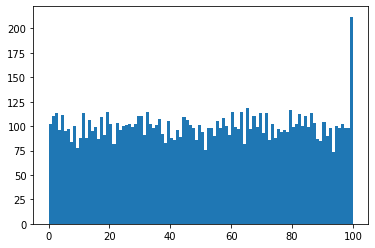

50.0427 50.0 29.17848548351184


In [24]:
from matplotlib import pyplot as plt
from statistics import mean, median, stdev

data = [randint(0,100) for i in range(10000)]

plt.hist(data,bins=100)

plt.show()

print(mean(data),median(data),stdev(data))

How many iterations:  100000


Value 1: 10
Value 1001: 891
Value 2001: 806
Value 3001: 746
Value 4001: 721
Value 5001: 823
Value 6001: 646
Value 7001: 610
Value 8001: 601
Value 9001: 47
Value 10001: 604
Value 11001: 728
Value 12001: 730
Value 13001: 544
Value 14001: 387
Value 15001: 423
Value 16001: 604
Value 17001: 17
Value 18001: 46
Value 19001: 260
Value 20001: 114
Value 21001: 195
Value 22001: 860
Value 23001: 641
Value 24001: 208
Value 25001: 19
Value 26001: 850
Value 27001: 61
Value 28001: 730
Value 29001: 486
Value 30001: 972
Value 31001: 1001
Value 32001: 244
Value 33001: 804
Value 34001: 642
Value 35001: 215
Value 36001: 988
Value 37001: 947
Value 38001: 732
Value 39001: 884
Value 40001: 870
Value 41001: 821
Value 42001: 173
Value 43001: 884
Value 44001: 550
Value 45001: 670
Value 46001: 213
Value 47001: 302
Value 48001: 366
Value 49001: 879
Value 50001: 82
Value 51001: 50
Value 52001: 506
Value 53001: 647
Value 54001: 405
Value 55001: 769
Value 56001: 177
Value 57001: 84
Value 58001: 29
Value 59001: 823
Va

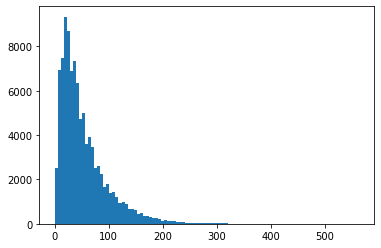

53.5641 40.0 45.60690201148409


In [205]:
iter = int(input("How many iterations: "))
total_time = 0
count_data = []


for i in range(iter):
    count = 0
    t0 = time.time()
    n = randint(0,1023)
    if i%1000 == 0:
        print("Value "+str(i+1)+":",n)
    while n != 0 and n != 1023:
        count += 1
        n = Generate(n)
        #print("Gen",str(count)+":",n)
    count_data.append(count)
    t1 = time.time()
    total_time+= t1 - t0
    
print("Total Time:",total_time)
#times.append(t1-t0)

plt.hist(count_data,bins=100)
plt.show()
print(mean(count_data),median(count_data),stdev(count_data))

## Model 2

This model is more generalizable, although less computationally efficient in the base case.

I model the jar as a Jar object with population and number of phenotypes set by the user. 
The population of the jar is modeled as a dictionary. 

In [206]:

class Jar():
    pop = None
    phen = None
    pool_comp = []
    pool = dict()
    gen_count = 0
    
    def __init__(self,pop,phen):
        self.pop = pop
        self.phen = phen
        self.pool_comp = [0 for i in range(phen)]
        for i in range(pop):
            next = randint(0,phen-1)
            self.pool[i] = next
            self.pool_comp[next] += 1
        
            
    def generate(self):
        key_1 = randint(0,self.pop-1)
        key_2 = randint(0,self.pop-2)
        key_2 += int(key_2 >= key_1)
        
        #print(key_1,key_2)
        
        a = self.pool[key_1]
        b = self.pool[key_2]
        self.pool[key_1] = self.pool[key_2]
        if a != b:
            self.pool_comp[a] -= 1
            self.pool_comp[b] += 1
            
        self.gen_count += 1
         
    
    def dump(self):
        return str(self.pop) + ", " + str(self.phen) + ", " + str(self.pool_comp) + ", " + str(self.pool) + ", " +  str(self.gen_count)
    
    def is_done(self):
        if max(self.pool_comp) == self.pop: return True
        return False
    


j = Jar(10,2)
print(j.dump())
while not j.is_done():
    j.generate()

print(j.dump())
print(j.gen_count)




10, 2, [5, 5], {0: 1, 1: 1, 2: 1, 3: 0, 4: 0, 5: 0, 6: 1, 7: 0, 8: 1, 9: 0}, 0
10, 2, [10, 0], {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}, 46
46


Jar Experiment
**************



How Many Marbles:  10
How Many Colors:  2
How many iterations:  100000


Count 0: 200
Count 1000: 46
Count 2000: 8
Count 3000: 15
Count 4000: 51
Count 5000: 36
Count 6000: 93
Count 7000: 111
Count 8000: 39
Count 9000: 48
Count 10000: 20
Count 11000: 59
Count 12000: 52
Count 13000: 33
Count 14000: 48
Count 15000: 14
Count 16000: 97
Count 17000: 75
Count 18000: 23
Count 19000: 149
Count 20000: 241
Count 21000: 41
Count 22000: 12
Count 23000: 49
Count 24000: 47
Count 25000: 238
Count 26000: 17
Count 27000: 68
Count 28000: 21
Count 29000: 11
Count 30000: 33
Count 31000: 17
Count 32000: 116
Count 33000: 58
Count 34000: 49
Count 35000: 202
Count 36000: 106
Count 37000: 19
Count 38000: 156
Count 39000: 13
Count 40000: 50
Count 41000: 8
Count 42000: 23
Count 43000: 21
Count 44000: 152
Count 45000: 61
Count 46000: 4
Count 47000: 74
Count 48000: 69
Count 49000: 21
Count 50000: 57
Count 51000: 10
Count 52000: 22
Count 53000: 29
Count 54000: 45
Count 55000: 11
Count 56000: 38
Count 57000: 18
Count 58000: 34
Count 59000: 60
Count 60000: 58
Count 61000: 16
Count 62000: 4

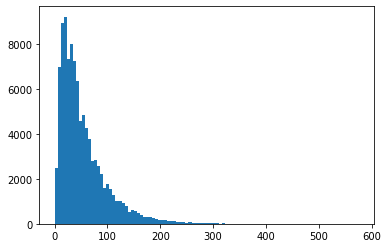

53.47603 40.0 45.32806340196344


In [208]:
print("Jar Experiment")
print("**************")
print()

pop = int(input("How Many Marbles: "))
phen = int(input("How Many Colors: "))
iter = int(input("How many iterations: "))
total_time = 0

count_data = []
total_time = 0

for i in range(iter):
    t0 = time.time()
    j = Jar(pop,phen)
    while not j.is_done():
        j.generate()
    count_data.append(j.gen_count)
    if i%1000 == 0:
        print("Count "+str(i)+":",j.gen_count)
    t1 = time.time()
    total_time += t1 - t0

print("Total Time:",total_time)

plt.hist(count_data,bins=100)
plt.show()
print(mean(count_data),median(count_data),stdev(count_data))


    